In [1]:
import numpy as np
from lbg_forecast.nz_model import NzModel
import matplotlib.pyplot as plt

from lbg_forecast.modified_redshift import u_dropout
from lbg_forecast.modified_redshift import g_dropout
from lbg_forecast.modified_redshift import r_dropout

In [2]:
z_space = np.arange(0, 7, 0.01)

In [3]:
model = NzModel(z_space)

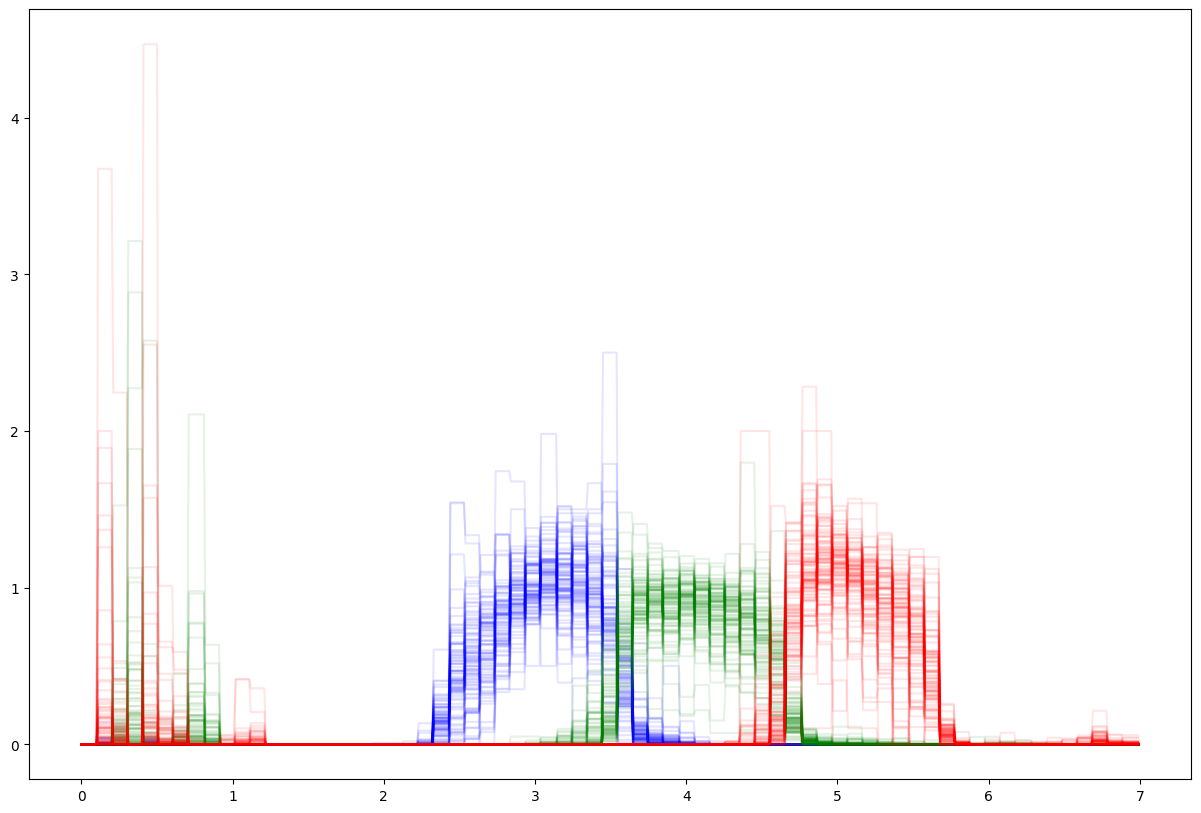

In [4]:
model.plot_all_data()

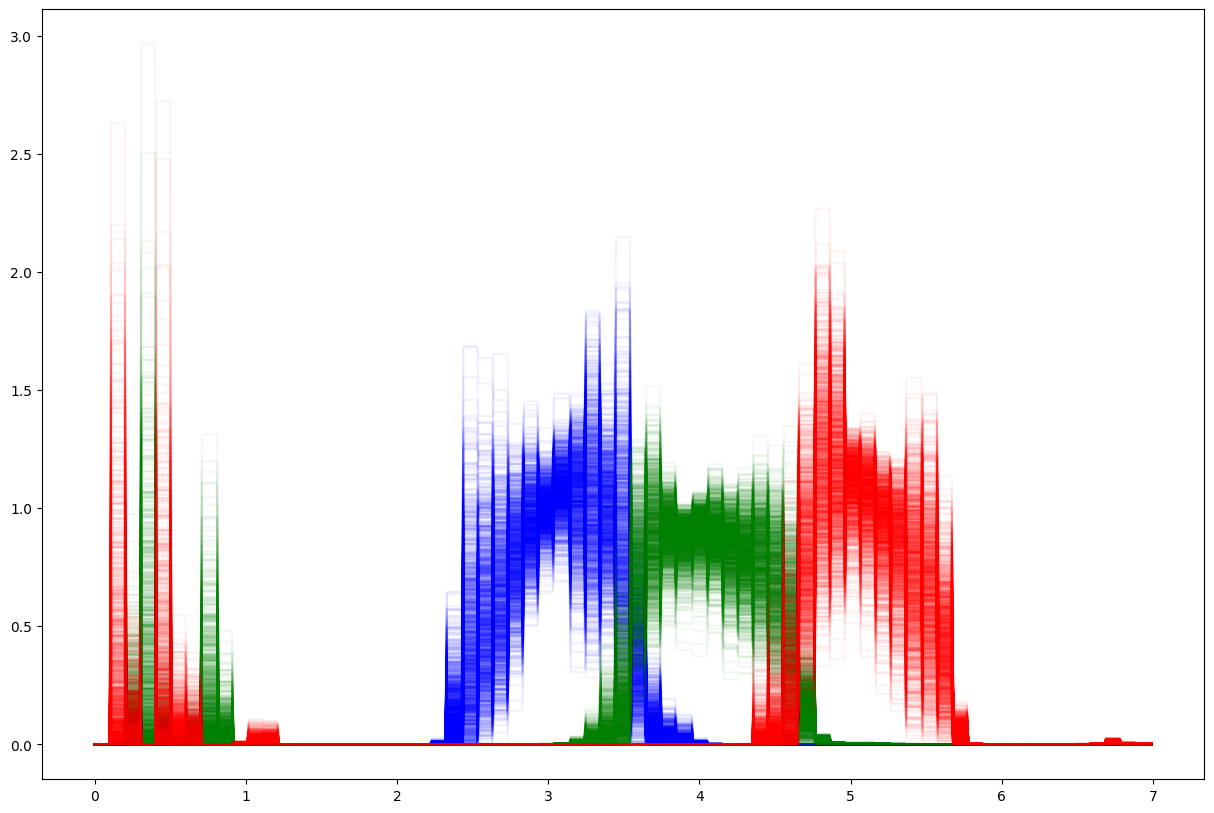

In [5]:
model.plot_all_pca(4, 2000)

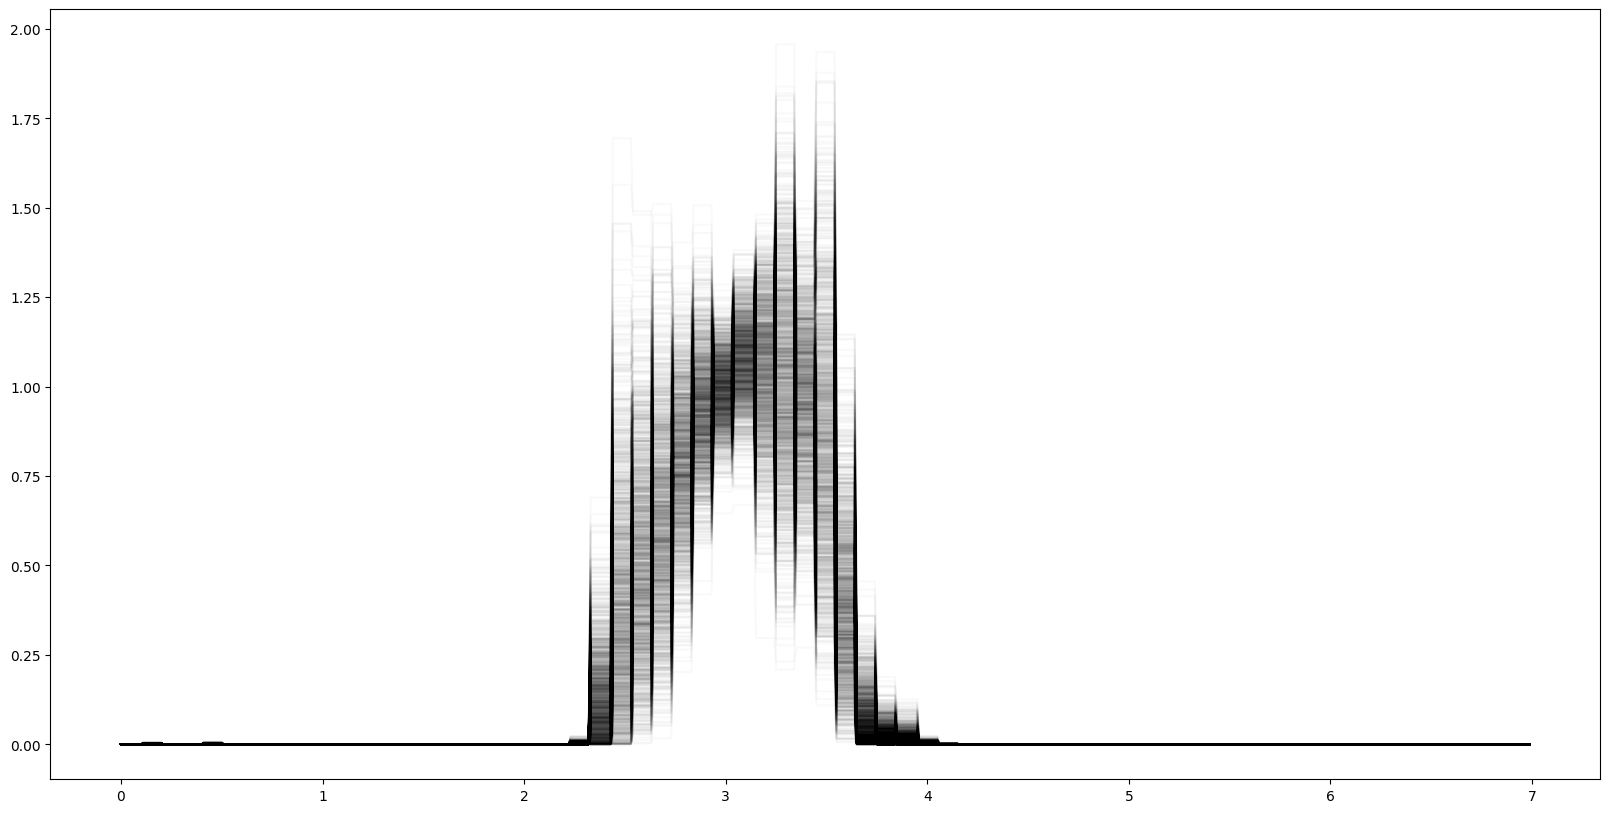

In [6]:
model.plot_nzs(model.u_pca(4, 2000))

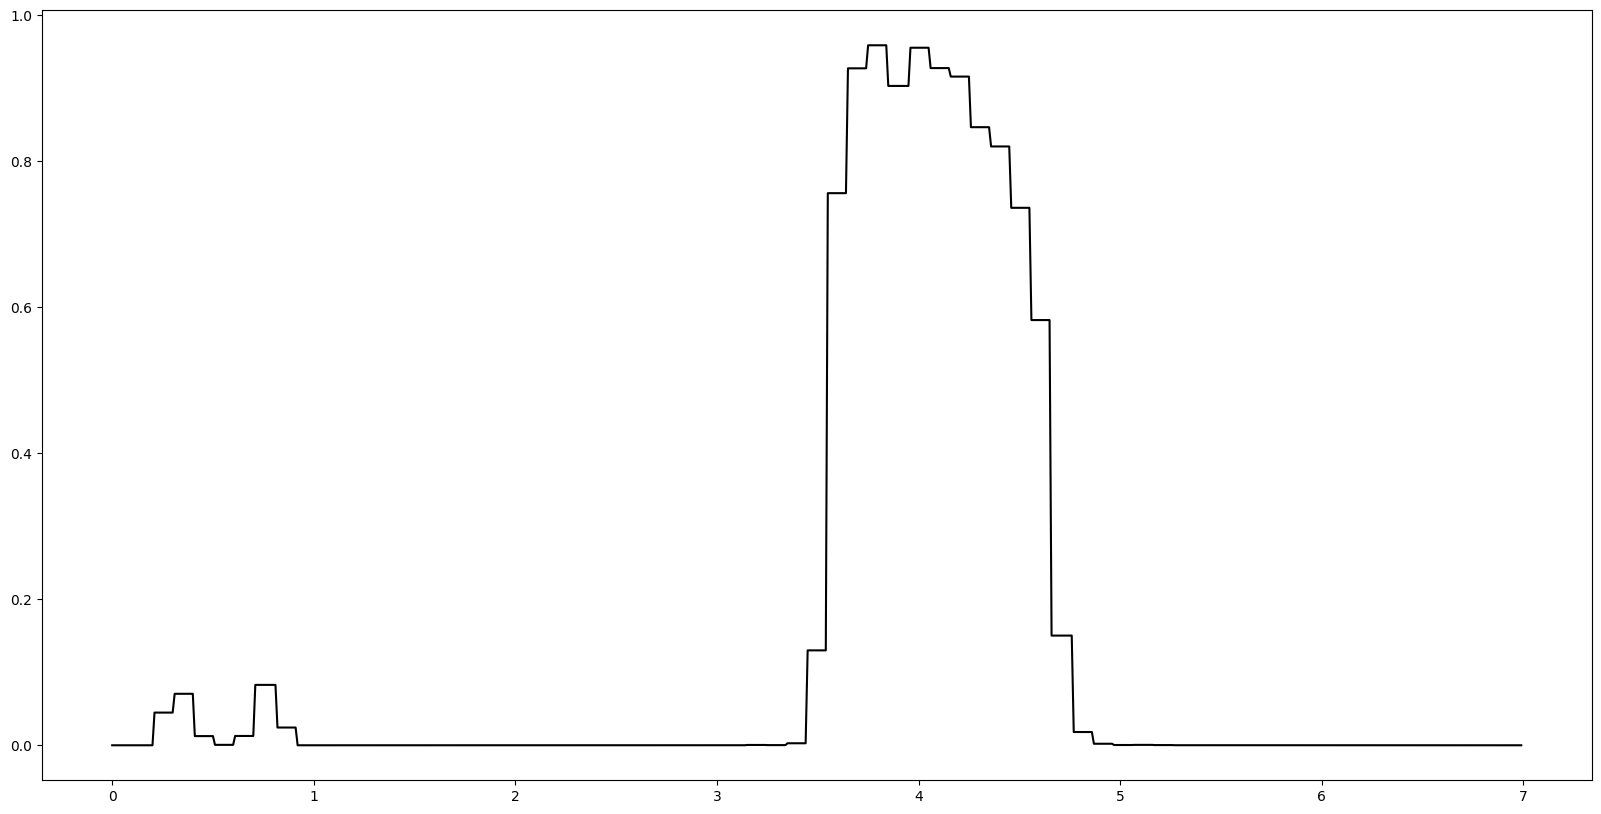

In [7]:
nzs = model.g_pca(4, 100)
nz = nzs[0]
model.plot_nzs(np.array([nz]), alpha=1)

In [8]:
model.interloper_fraction(nz)

0.025657245475018943

In [9]:
model.normalisation(nz)

1.0

In [10]:
from lbg_forecast.nz_model import perform_npca
from lbg_forecast.nz_model import gauss_npca

In [11]:
bin_data = model.u_data()
components = 10

In [12]:
bin_pca = perform_npca(bin_data, components)

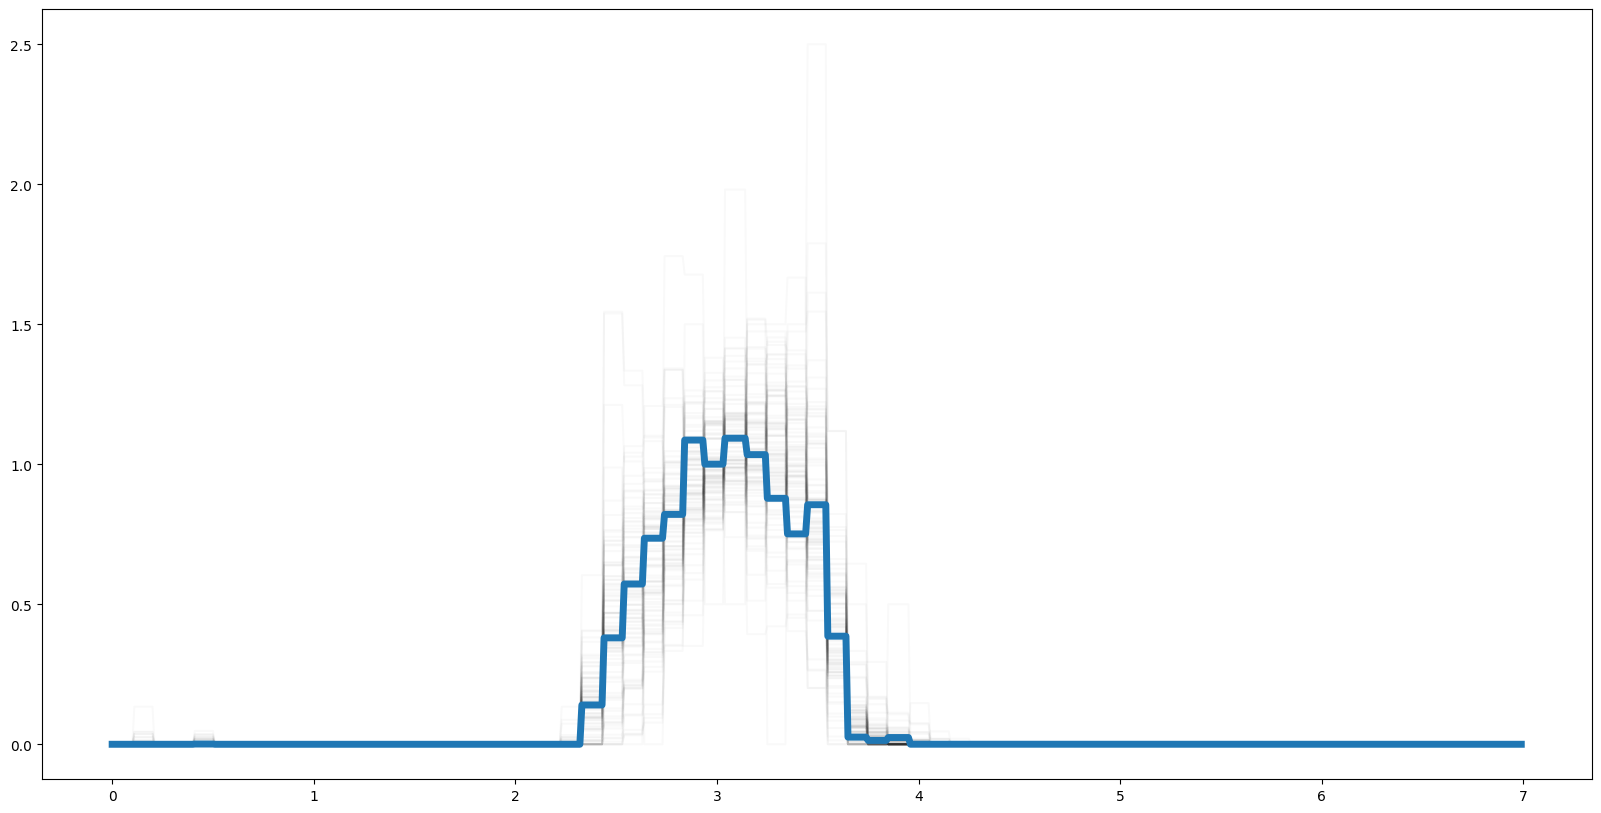

In [13]:
model.plot_nzs(bin_data)
plt.plot(z_space, gauss_npca(bin_pca, 1)[0], lw=5)

In [14]:
model.save_4pca_data()

In [15]:
nz_u = u_dropout((0.5, 0.5, 0.5, 0.5), gals_per_arcmin2 = 1)

In [16]:
arr = []
for z in z_space:
    arr.append(nz_u.pz_fn(z))
    
nzz = np.array(arr)

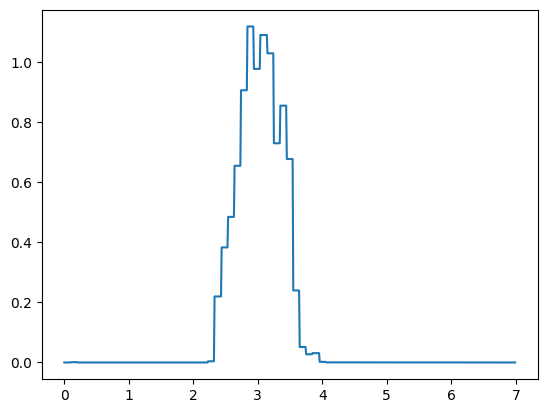

In [17]:
plt.plot(z_space, nzz)

In [18]:
means = np.load("lbg_forecast/4pca_data/4pca_means_g.npy")
means

array([ 3.68594044e-16,  8.43769499e-17,  2.24820162e-16, -8.24063040e-16])

In [19]:
cov = np.load("lbg_forecast/4pca_data/4pca_cov_g.npy")
cov

array([[ 3.28193345e+00, -1.35650028e-15,  1.20637382e-15,
         4.74271630e-17],
       [-1.35650028e-15,  1.64900647e+00,  4.20483841e-15,
         4.12370702e-16],
       [ 1.20637382e-15,  4.20483841e-15,  4.01496004e-01,
         8.15416414e-17],
       [ 4.74271630e-17,  4.12370702e-16,  8.15416414e-17,
         2.45949786e-01]])

In [20]:
nz_params = np.random.multivariate_normal(means, cov)

In [21]:
nz_g = g_dropout(nz_params, gals_per_arcmin2 = 1)

In [22]:
arr = []
for z in z_space:
    arr.append(nz_g.pz_fn(z))
    
nzz = np.array(arr)

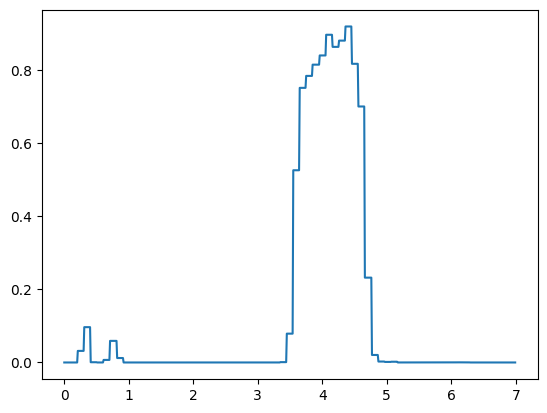

In [23]:
plt.plot(z_space, nzz)